# Import the libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the dataset.

In [2]:
import pandas as pd
df = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
#Get the numbers of rows and columns.
df.shape

(614, 13)

In [4]:
#Check column of the dataframe.
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
#Get the column datatypes.
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
#Basic information about dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
#Get a count of the empty values for each column.
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
#Check any missing/null values in the dataset.
df.isnull().values.any()

True

<AxesSubplot:>

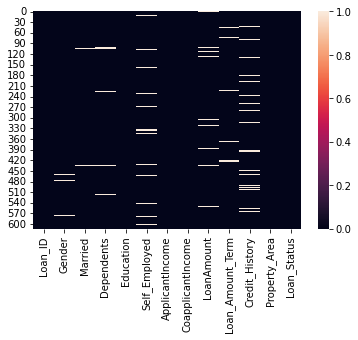

In [9]:
#Checking for null values using heatmap.
sns.heatmap(df.isnull())

In [10]:
#Replacing NA values of object type with mode using SimpleImputer function.
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy = "most_frequent")
df['Gender'] = imp.fit_transform(df['Gender'].values.reshape(-1,1))
df['Married'] = imp.fit_transform(df['Married'].values.reshape(-1,1))
df['Dependents'] = imp.fit_transform(df['Dependents'].values.reshape(-1,1))
df['Self_Employed'] = imp.fit_transform(df['Self_Employed'].values.reshape(-1,1))

In [11]:
#Replacing NA values of float type with mean using SimpleImputer function.
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy = "mean")
df['LoanAmount'] = imp.fit_transform(df['LoanAmount'].values.reshape(-1,1))
df['Loan_Amount_Term'] = imp.fit_transform(df['Loan_Amount_Term'].values.reshape(-1,1))
df['Credit_History'] = imp.fit_transform(df['Credit_History'].values.reshape(-1,1))

In [12]:
#Get a count of the empty values for each column.
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
#Print all of the data types and their unique values.
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ' : ' + str(df[column].unique()))
        print(df[column].value_counts())
        print('____________________________________________')

Loan_ID : ['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273'
 'LP001275' 'LP001279' 'LP001280' 'LP001282' 'LP0012

# Data Analysis and Visualization

In [14]:
#summary statistics.
df.describe().style.background_gradient()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


Observation
Mean of ApplicantIncome, CoapplicantIncome, LoanAmount columns are geater than median, hence it is right skewed. Standard deviation is high in ApplicantIncome,CoapplicantIncome. It means data spread is high. high gap between 75th percentile and max is present in ApplicantIncome and CoapplicantIncome so, few outlier is present.

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

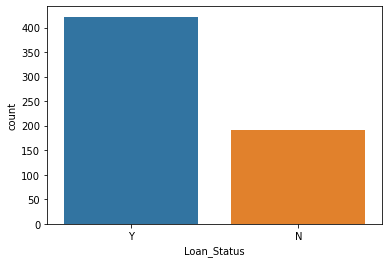

In [15]:
#Visualize the number of Loan_Status.
sns.countplot(df['Loan_Status'])

<AxesSubplot:xlabel='Education', ylabel='count'>

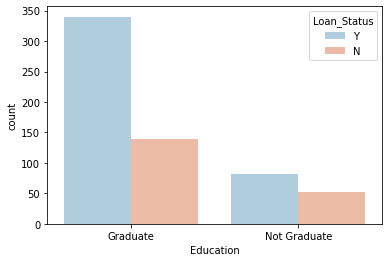

In [16]:
#Education and Loan_Status.
sns.countplot(x='Education', hue='Loan_Status', data=df, palette='RdBu_r')

<AxesSubplot:xlabel='Married', ylabel='count'>

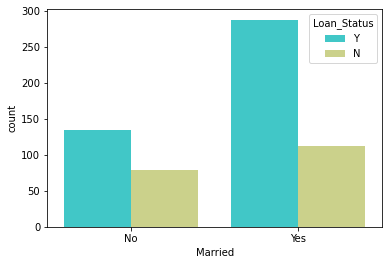

In [17]:
#Marital status and Loan_Status.
sns.countplot(x='Married', hue='Loan_Status', data=df, palette='rainbow')

<AxesSubplot:xlabel='Gender', ylabel='count'>

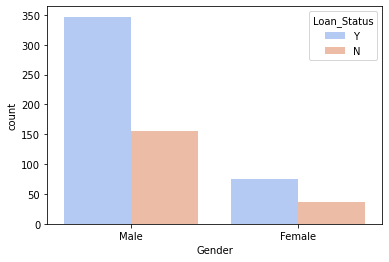

In [18]:
#Gender and Loan_Status.
sns.countplot(x='Gender', hue='Loan_Status', data=df, palette='coolwarm')

array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>],
       [<AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'Loan_Amount_Term'}>],
       [<AxesSubplot:title={'center':'Credit_History'}>, <AxesSubplot:>]],
      dtype=object)

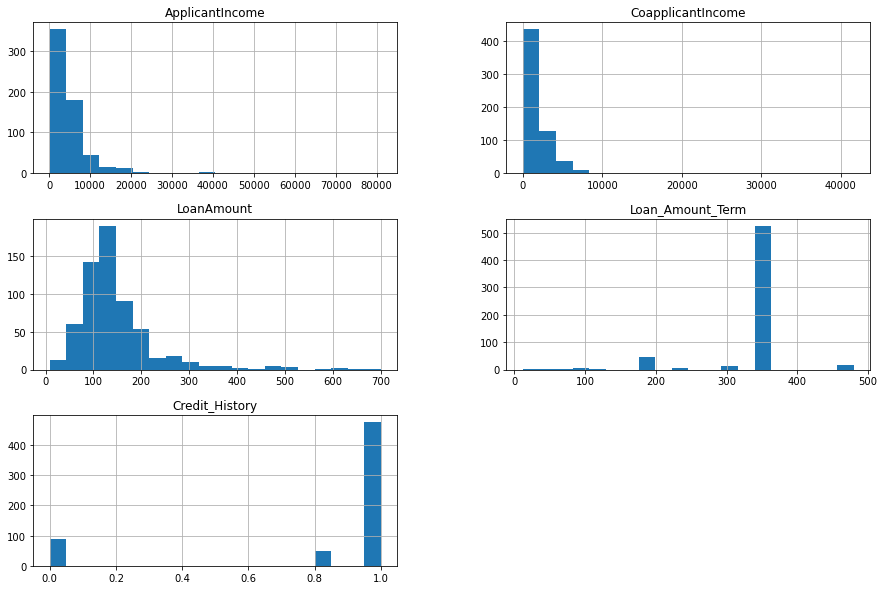

In [19]:
#display histogram of all columns.
df.hist(figsize=(15,10), layout=(3,2), sharex=False, bins=20)

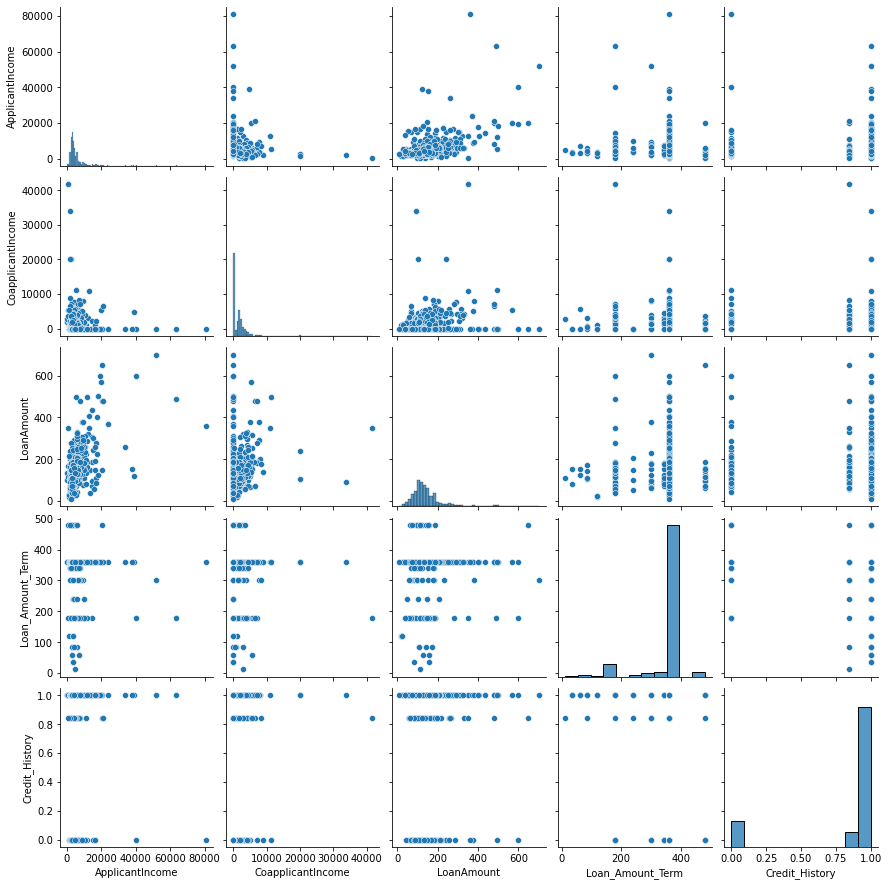

In [20]:
sns.pairplot(df)

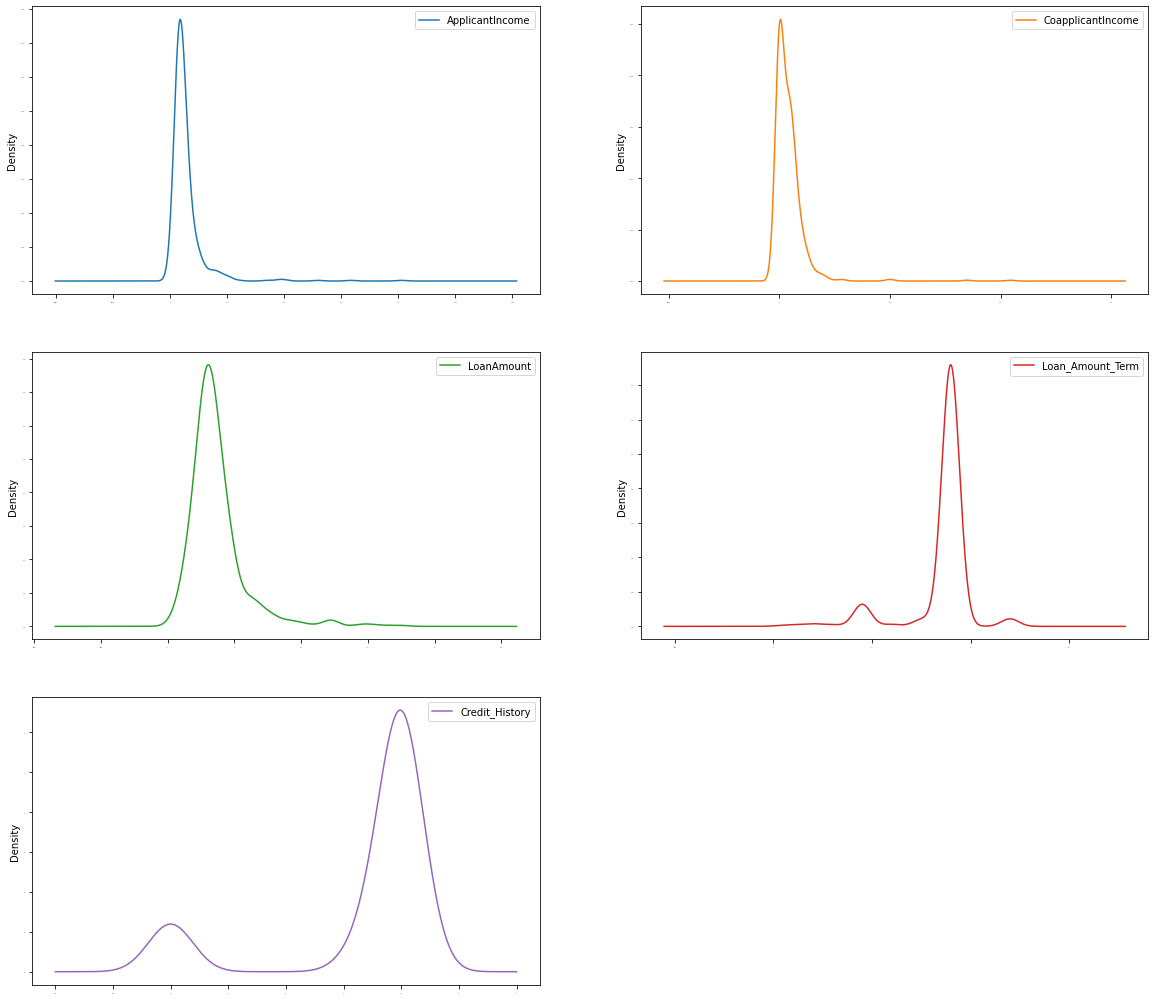

In [21]:
# Let's check the data distribution among all the columns.
df.plot(kind='density', subplots=True, layout=(3,2), sharex=False, legend=True, fontsize=1, figsize=(20,18))
plt.show()

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

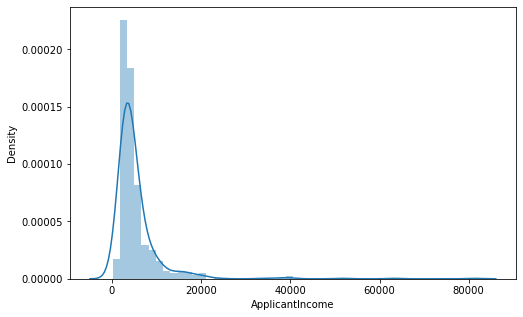

In [22]:
#display distplot of columns.
plt.figure(figsize=(8,5))
sns.distplot(df['ApplicantIncome'])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

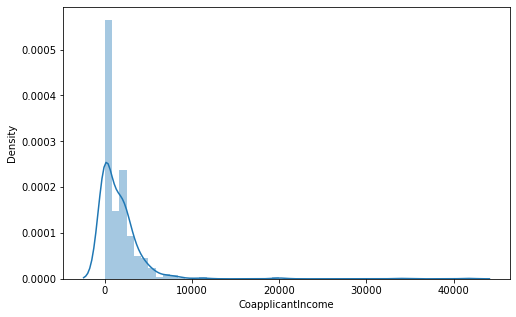

In [23]:
#display distplot of columns.
plt.figure(figsize=(8,5))
sns.distplot(df['CoapplicantIncome'])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

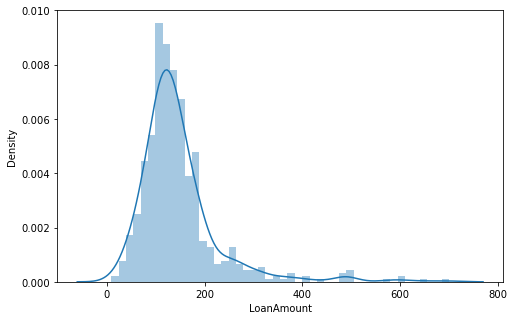

In [24]:
#display distplot of columns.
plt.figure(figsize=(8,5))
sns.distplot(df['LoanAmount'])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

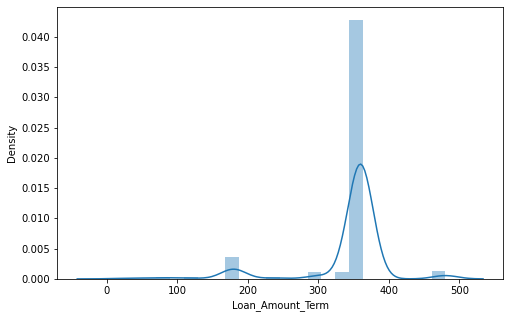

In [25]:
#display distplot of columns.
plt.figure(figsize=(8,5))
sns.distplot(df['Loan_Amount_Term'])

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

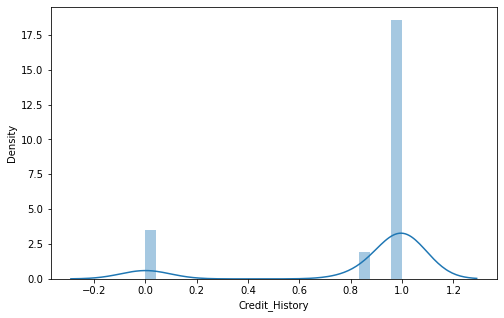

In [26]:
#display distplot of columns.
plt.figure(figsize=(8,5))
sns.distplot(df['Credit_History'])

# Remove skewness and outliers

In [27]:
#Check skewness
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
dtype: float64

In [28]:
#Remove skewness using log transform and sqrt method.
import numpy as np
df['ApplicantIncome']=np.log(df['ApplicantIncome'])
df['CoapplicantIncome'] = np.sqrt(df['CoapplicantIncome'])
df['LoanAmount'] = np.sqrt(df['LoanAmount'])
df.skew()

ApplicantIncome      0.479580
CoapplicantIncome    0.979561
LoanAmount           1.314162
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
dtype: float64

array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>],
       [<AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'Loan_Amount_Term'}>],
       [<AxesSubplot:title={'center':'Credit_History'}>, <AxesSubplot:>]],
      dtype=object)

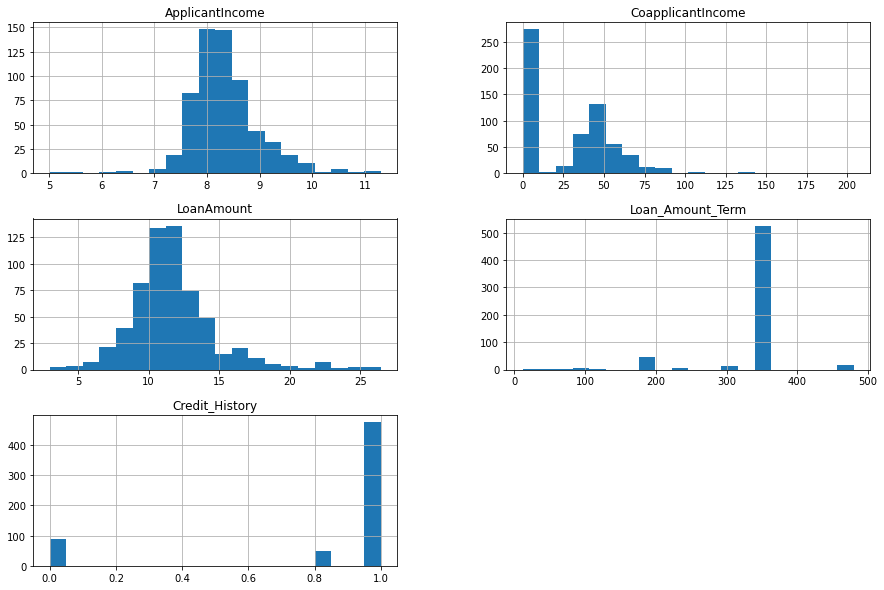

In [29]:
#display histogram of all columns after remove skewness.
df.hist(figsize=(15,10), layout=(3,2), sharex=False, bins=20)

ApplicantIncome         AxesSubplot(0.125,0.536818;0.110714x0.343182)
CoapplicantIncome    AxesSubplot(0.257857,0.536818;0.110714x0.343182)
LoanAmount           AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Loan_Amount_Term     AxesSubplot(0.523571,0.536818;0.110714x0.343182)
Credit_History       AxesSubplot(0.656429,0.536818;0.110714x0.343182)
dtype: object

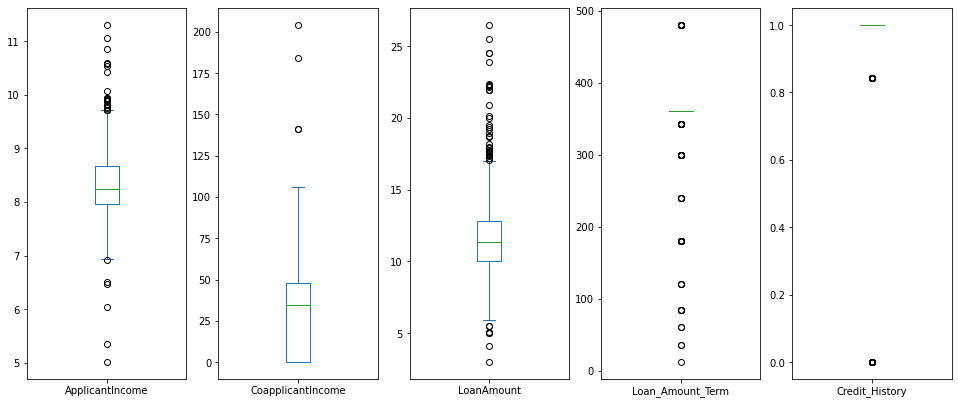

In [30]:
#checking outliers with boxplot.
df.plot(kind='box', subplots=True, layout=(2,6), figsize=(20,15))

In [31]:
#create dataframe for numeric column
numeric_data = df.select_dtypes(include=[np.number])
numeric_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,8.674026,0.000000,12.100089,360.0,1.0
1,8.430109,38.832976,11.313708,360.0,1.0
2,8.006368,0.000000,8.124038,360.0,1.0
3,7.856707,48.559242,10.954451,360.0,1.0
4,8.699515,0.000000,11.874342,360.0,1.0
...,...,...,...,...,...
609,7.972466,0.000000,8.426150,360.0,1.0
610,8.320205,0.000000,6.324555,180.0,1.0
611,8.996157,15.491933,15.905974,360.0,1.0
612,8.933664,0.000000,13.674794,360.0,1.0


In [32]:
#Lets quantify
from scipy.stats import zscore
(np.abs(zscore(numeric_data))<3).all()

ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History        True
dtype: bool

In [33]:
#detecting outliers
from scipy.stats import zscore
z = np.abs(zscore(numeric_data))
print(np.where(z>3))

(array([ 14,  68,  94, 130, 133, 155, 155, 171, 171, 177, 183, 185, 216,
       242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417, 443, 468,
       487, 495, 497, 506, 523, 546, 561, 575, 581, 585, 600, 600, 604],
      dtype=int64), array([3, 3, 3, 2, 3, 0, 2, 0, 2, 2, 0, 0, 0, 3, 3, 2, 2, 3, 0, 2, 2, 1,
       0, 1, 0, 0, 2, 3, 3, 2, 2, 3, 2, 3, 1, 3, 0, 1, 2], dtype=int64))


In [34]:
#removing outliers
dfnew = df[(z<3).all(axis=1)]
print('dfnew shape = ',dfnew.shape)
df = dfnew

dfnew shape =  (579, 13)


# Label Encoder

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

list1 = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
for val in list1:
    df[val] = le.fit_transform(df[val].astype(str)) 
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,8.674026,0.000000,12.100089,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,8.430109,38.832976,11.313708,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,8.006368,0.000000,8.124038,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,7.856707,48.559242,10.954451,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,8.699515,0.000000,11.874342,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,7.972466,0.000000,8.426150,360.0,1.0,0,1
610,LP002979,1,1,3,0,0,8.320205,0.000000,6.324555,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8.996157,15.491933,15.905974,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,8.933664,0.000000,13.674794,360.0,1.0,2,1


In [36]:
#check correlation of columns.
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.382204,0.195744,0.051370,-0.006053,0.056084,0.225355,0.172971,-0.103278,0.019402,-0.027664,0.021547
Married,0.382204,1.000000,0.333578,0.022368,-0.011440,-0.007028,0.299668,0.176258,-0.127272,0.012837,0.008992,0.088047
Dependents,0.195744,0.333578,1.000000,0.061944,0.049016,0.131503,-0.020387,0.146366,-0.082304,-0.014939,-0.007248,0.016997
Education,0.051370,0.022368,0.061944,1.000000,-0.007622,-0.178732,0.008129,-0.137866,-0.096267,-0.083812,-0.067232,-0.096817
Self_Employed,-0.006053,-0.011440,0.049016,-0.007622,1.000000,0.212856,-0.071912,0.122773,-0.032217,-0.013043,-0.033911,-0.023759
ApplicantIncome,0.056084,-0.007028,0.131503,-0.178732,0.212856,1.000000,-0.319066,0.489061,-0.062668,0.051668,-0.039097,-0.007335
CoapplicantIncome,0.225355,0.299668,-0.020387,0.008129,-0.071912,-0.319066,1.000000,0.239477,-0.028107,-0.010499,-0.080683,0.052585
LoanAmount,0.172971,0.176258,0.146366,-0.137866,0.122773,0.489061,0.239477,1.000000,0.050830,0.007620,-0.101799,-0.024475
Loan_Amount_Term,-0.103278,-0.127272,-0.082304,-0.096267,-0.032217,-0.062668,-0.028107,0.050830,1.000000,0.030793,-0.059453,-0.017574
Credit_History,0.019402,0.012837,-0.014939,-0.083812,-0.013043,0.051668,-0.010499,0.007620,0.030793,1.000000,-0.010788,0.562275


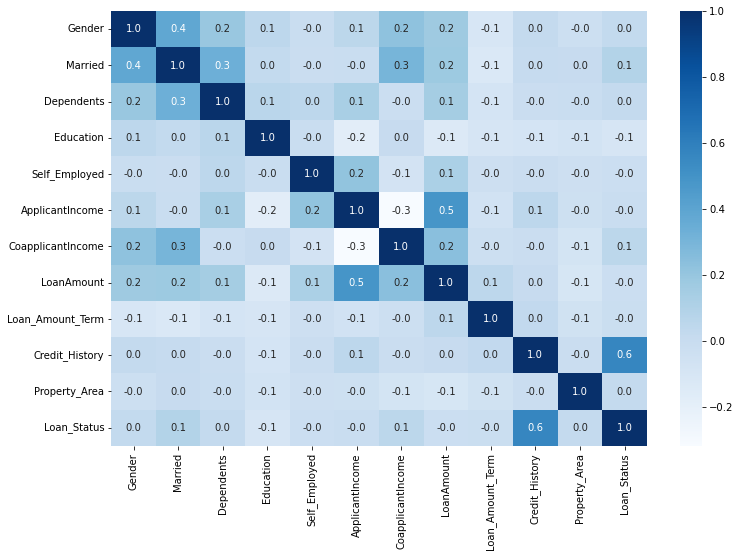

In [37]:
#check correlation matrix with heatmap.
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt = '.1f', cmap = 'Blues')
#sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()

Observation - Credit_History is highly correlate with Loan_Status (target variable) means credit history score is good then high chances to outcome of loan status is yes or positive.

# MultiCollinearity with Variance Inflation Factor (VIF)

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [39]:
x = df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y = df['Loan_Status']

In [40]:
def calc_vif():
    vif = pd.DataFrame()
    vif['Features'] = x.columns
    vif['VIF Factor'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    print(vif)

In [41]:
calc_vif()

             Features  VIF Factor
0              Gender    6.686535
1             Married    3.956018
2          Dependents    1.804651
3           Education    1.316638
4       Self_Employed    1.188914
5     ApplicantIncome   85.286693
6   CoapplicantIncome    2.688929
7          LoanAmount   35.474221
8    Loan_Amount_Term   39.219093
9      Credit_History    6.708662
10      Property_Area    2.724200


# Data Preprocessing

In [42]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,8.674026,0.000000,12.100089,360.0,1.0,2
1,1,1,1,0,0,8.430109,38.832976,11.313708,360.0,1.0,0
2,1,1,0,0,1,8.006368,0.000000,8.124038,360.0,1.0,2
3,1,1,0,1,0,7.856707,48.559242,10.954451,360.0,1.0,2
4,1,0,0,0,0,8.699515,0.000000,11.874342,360.0,1.0,2


In [43]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int32

In [44]:
print(x.shape, y.shape)

(579, 11) (579,)


# Scaling the data

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
st = StandardScaler()
x = st.fit_transform(x)
x

array([[ 0.47339358, -1.3609617 , -0.72567849, ...,  0.23897043,
         0.45550845,  1.2301098 ],
       [ 0.47339358,  0.73477453,  0.27710873, ...,  0.23897043,
         0.45550845, -1.30452926],
       [ 0.47339358,  0.73477453, -0.72567849, ...,  0.23897043,
         0.45550845,  1.2301098 ],
       ...,
       [ 0.47339358,  0.73477453,  0.27710873, ...,  0.23897043,
         0.45550845,  1.2301098 ],
       [ 0.47339358,  0.73477453,  1.27989596, ...,  0.23897043,
         0.45550845,  1.2301098 ],
       [-2.11240719, -1.3609617 , -0.72567849, ...,  0.23897043,
        -2.37732055, -0.03720973]])

# Since the outcome has only two variables we will use binary classification model.

In [47]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

from sklearn.svm import SVC
svc = SVC()

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Training process begins

Finding best random_state with different models

In [48]:
model = [lr,rfc,dtc,svc,gnb]

maxAccu = 0
maxRS = 0

for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .20, random_state = i)
    for m in model:
        m.fit(x_train,y_train)
        pred_test = m.predict(x_test)
        acc = accuracy_score(y_test, pred_test)
        print('accuracy score of', m , 'is :-', acc, 'on random_state', i)
        
    print('\n')
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i

accuracy score of LogisticRegression() is :- 0.7844827586206896 on random_state 1
accuracy score of RandomForestClassifier() is :- 0.7844827586206896 on random_state 1
accuracy score of DecisionTreeClassifier() is :- 0.7155172413793104 on random_state 1
accuracy score of SVC() is :- 0.7844827586206896 on random_state 1
accuracy score of GaussianNB() is :- 0.7672413793103449 on random_state 1


accuracy score of LogisticRegression() is :- 0.8620689655172413 on random_state 2
accuracy score of RandomForestClassifier() is :- 0.853448275862069 on random_state 2
accuracy score of DecisionTreeClassifier() is :- 0.7068965517241379 on random_state 2
accuracy score of SVC() is :- 0.8448275862068966 on random_state 2
accuracy score of GaussianNB() is :- 0.8275862068965517 on random_state 2


accuracy score of LogisticRegression() is :- 0.75 on random_state 3
accuracy score of RandomForestClassifier() is :- 0.7068965517241379 on random_state 3
accuracy score of DecisionTreeClassifier() is :- 0.67

accuracy score of RandomForestClassifier() is :- 0.7931034482758621 on random_state 22
accuracy score of DecisionTreeClassifier() is :- 0.6551724137931034 on random_state 22
accuracy score of SVC() is :- 0.8017241379310345 on random_state 22
accuracy score of GaussianNB() is :- 0.8017241379310345 on random_state 22


accuracy score of LogisticRegression() is :- 0.8017241379310345 on random_state 23
accuracy score of RandomForestClassifier() is :- 0.8017241379310345 on random_state 23
accuracy score of DecisionTreeClassifier() is :- 0.7327586206896551 on random_state 23
accuracy score of SVC() is :- 0.8103448275862069 on random_state 23
accuracy score of GaussianNB() is :- 0.8017241379310345 on random_state 23


accuracy score of LogisticRegression() is :- 0.8189655172413793 on random_state 24
accuracy score of RandomForestClassifier() is :- 0.7931034482758621 on random_state 24
accuracy score of DecisionTreeClassifier() is :- 0.7241379310344828 on random_state 24
accuracy score of SVC(

accuracy score of RandomForestClassifier() is :- 0.7931034482758621 on random_state 43
accuracy score of DecisionTreeClassifier() is :- 0.6982758620689655 on random_state 43
accuracy score of SVC() is :- 0.7931034482758621 on random_state 43
accuracy score of GaussianNB() is :- 0.8017241379310345 on random_state 43


accuracy score of LogisticRegression() is :- 0.8620689655172413 on random_state 44
accuracy score of RandomForestClassifier() is :- 0.8189655172413793 on random_state 44
accuracy score of DecisionTreeClassifier() is :- 0.7241379310344828 on random_state 44
accuracy score of SVC() is :- 0.853448275862069 on random_state 44
accuracy score of GaussianNB() is :- 0.853448275862069 on random_state 44


accuracy score of LogisticRegression() is :- 0.8879310344827587 on random_state 45
accuracy score of RandomForestClassifier() is :- 0.853448275862069 on random_state 45
accuracy score of DecisionTreeClassifier() is :- 0.8103448275862069 on random_state 45
accuracy score of SVC() i

accuracy score of RandomForestClassifier() is :- 0.7931034482758621 on random_state 64
accuracy score of DecisionTreeClassifier() is :- 0.7068965517241379 on random_state 64
accuracy score of SVC() is :- 0.8189655172413793 on random_state 64
accuracy score of GaussianNB() is :- 0.8017241379310345 on random_state 64


accuracy score of LogisticRegression() is :- 0.8103448275862069 on random_state 65
accuracy score of RandomForestClassifier() is :- 0.7758620689655172 on random_state 65
accuracy score of DecisionTreeClassifier() is :- 0.6982758620689655 on random_state 65
accuracy score of SVC() is :- 0.7931034482758621 on random_state 65
accuracy score of GaussianNB() is :- 0.8017241379310345 on random_state 65


accuracy score of LogisticRegression() is :- 0.8103448275862069 on random_state 66
accuracy score of RandomForestClassifier() is :- 0.7758620689655172 on random_state 66
accuracy score of DecisionTreeClassifier() is :- 0.7413793103448276 on random_state 66
accuracy score of SVC(

accuracy score of RandomForestClassifier() is :- 0.8103448275862069 on random_state 85
accuracy score of DecisionTreeClassifier() is :- 0.7413793103448276 on random_state 85
accuracy score of SVC() is :- 0.8275862068965517 on random_state 85
accuracy score of GaussianNB() is :- 0.8189655172413793 on random_state 85


accuracy score of LogisticRegression() is :- 0.8017241379310345 on random_state 86
accuracy score of RandomForestClassifier() is :- 0.8017241379310345 on random_state 86
accuracy score of DecisionTreeClassifier() is :- 0.6982758620689655 on random_state 86
accuracy score of SVC() is :- 0.8103448275862069 on random_state 86
accuracy score of GaussianNB() is :- 0.8017241379310345 on random_state 86


accuracy score of LogisticRegression() is :- 0.7758620689655172 on random_state 87
accuracy score of RandomForestClassifier() is :- 0.7413793103448276 on random_state 87
accuracy score of DecisionTreeClassifier() is :- 0.6896551724137931 on random_state 87
accuracy score of SVC(

accuracy score of RandomForestClassifier() is :- 0.7672413793103449 on random_state 106
accuracy score of DecisionTreeClassifier() is :- 0.7413793103448276 on random_state 106
accuracy score of SVC() is :- 0.8103448275862069 on random_state 106
accuracy score of GaussianNB() is :- 0.8189655172413793 on random_state 106


accuracy score of LogisticRegression() is :- 0.8189655172413793 on random_state 107
accuracy score of RandomForestClassifier() is :- 0.8103448275862069 on random_state 107
accuracy score of DecisionTreeClassifier() is :- 0.7241379310344828 on random_state 107
accuracy score of SVC() is :- 0.8189655172413793 on random_state 107
accuracy score of GaussianNB() is :- 0.8189655172413793 on random_state 107


accuracy score of LogisticRegression() is :- 0.8275862068965517 on random_state 108
accuracy score of RandomForestClassifier() is :- 0.8189655172413793 on random_state 108
accuracy score of DecisionTreeClassifier() is :- 0.6810344827586207 on random_state 108
accuracy s

accuracy score of RandomForestClassifier() is :- 0.7758620689655172 on random_state 127
accuracy score of DecisionTreeClassifier() is :- 0.7155172413793104 on random_state 127
accuracy score of SVC() is :- 0.8103448275862069 on random_state 127
accuracy score of GaussianNB() is :- 0.7931034482758621 on random_state 127


accuracy score of LogisticRegression() is :- 0.8275862068965517 on random_state 128
accuracy score of RandomForestClassifier() is :- 0.8189655172413793 on random_state 128
accuracy score of DecisionTreeClassifier() is :- 0.7327586206896551 on random_state 128
accuracy score of SVC() is :- 0.8362068965517241 on random_state 128
accuracy score of GaussianNB() is :- 0.8189655172413793 on random_state 128


accuracy score of LogisticRegression() is :- 0.8275862068965517 on random_state 129
accuracy score of RandomForestClassifier() is :- 0.7672413793103449 on random_state 129
accuracy score of DecisionTreeClassifier() is :- 0.8103448275862069 on random_state 129
accuracy s

accuracy score of RandomForestClassifier() is :- 0.8275862068965517 on random_state 148
accuracy score of DecisionTreeClassifier() is :- 0.7844827586206896 on random_state 148
accuracy score of SVC() is :- 0.8362068965517241 on random_state 148
accuracy score of GaussianNB() is :- 0.8362068965517241 on random_state 148


accuracy score of LogisticRegression() is :- 0.8275862068965517 on random_state 149
accuracy score of RandomForestClassifier() is :- 0.8275862068965517 on random_state 149
accuracy score of DecisionTreeClassifier() is :- 0.7327586206896551 on random_state 149
accuracy score of SVC() is :- 0.8362068965517241 on random_state 149
accuracy score of GaussianNB() is :- 0.8275862068965517 on random_state 149


accuracy score of LogisticRegression() is :- 0.7931034482758621 on random_state 150
accuracy score of RandomForestClassifier() is :- 0.7844827586206896 on random_state 150
accuracy score of DecisionTreeClassifier() is :- 0.75 on random_state 150
accuracy score of SVC() 

accuracy score of RandomForestClassifier() is :- 0.8362068965517241 on random_state 169
accuracy score of DecisionTreeClassifier() is :- 0.7672413793103449 on random_state 169
accuracy score of SVC() is :- 0.8362068965517241 on random_state 169
accuracy score of GaussianNB() is :- 0.8103448275862069 on random_state 169


accuracy score of LogisticRegression() is :- 0.8017241379310345 on random_state 170
accuracy score of RandomForestClassifier() is :- 0.7758620689655172 on random_state 170
accuracy score of DecisionTreeClassifier() is :- 0.6896551724137931 on random_state 170
accuracy score of SVC() is :- 0.8103448275862069 on random_state 170
accuracy score of GaussianNB() is :- 0.8017241379310345 on random_state 170


accuracy score of LogisticRegression() is :- 0.8362068965517241 on random_state 171
accuracy score of RandomForestClassifier() is :- 0.8275862068965517 on random_state 171
accuracy score of DecisionTreeClassifier() is :- 0.6896551724137931 on random_state 171
accuracy s

accuracy score of RandomForestClassifier() is :- 0.8017241379310345 on random_state 190
accuracy score of DecisionTreeClassifier() is :- 0.6724137931034483 on random_state 190
accuracy score of SVC() is :- 0.8275862068965517 on random_state 190
accuracy score of GaussianNB() is :- 0.8362068965517241 on random_state 190


accuracy score of LogisticRegression() is :- 0.7844827586206896 on random_state 191
accuracy score of RandomForestClassifier() is :- 0.7844827586206896 on random_state 191
accuracy score of DecisionTreeClassifier() is :- 0.75 on random_state 191
accuracy score of SVC() is :- 0.7931034482758621 on random_state 191
accuracy score of GaussianNB() is :- 0.7844827586206896 on random_state 191


accuracy score of LogisticRegression() is :- 0.8275862068965517 on random_state 192
accuracy score of RandomForestClassifier() is :- 0.8362068965517241 on random_state 192
accuracy score of DecisionTreeClassifier() is :- 0.6982758620689655 on random_state 192
accuracy score of SVC() 

In [69]:
print("Best accuracy is ", maxAccu, "on random_state ", maxRS)

Best accuracy is  0.8879310344827587 on random_state  29


# Creating train-test split

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.20,random_state = 29)

In [51]:
x_train

array([[ 0.47339358,  0.73477453, -0.72567849, ...,  0.23897043,
         0.45550845, -0.03720973],
       [ 0.47339358,  0.73477453,  0.27710873, ..., -3.24334202,
         0.45550845, -1.30452926],
       [ 0.47339358,  0.73477453, -0.72567849, ...,  0.23897043,
         0.45550845, -1.30452926],
       ...,
       [ 0.47339358, -1.3609617 ,  1.27989596, ...,  0.23897043,
         0.45550845, -0.03720973],
       [ 0.47339358,  0.73477453,  0.27710873, ...,  2.56051207,
         0.45550845, -0.03720973],
       [ 0.47339358,  0.73477453, -0.72567849, ...,  0.23897043,
         0.45550845, -1.30452926]])

In [52]:
x_test

array([[-2.11240719, -1.3609617 ,  0.27710873, ...,  0.23897043,
         0.45550845,  1.2301098 ],
       [ 0.47339358,  0.73477453,  2.28268318, ...,  0.23897043,
         0.45550845,  1.2301098 ],
       [ 0.47339358,  0.73477453,  1.27989596, ...,  0.23897043,
        -2.37732055, -1.30452926],
       ...,
       [ 0.47339358,  0.73477453, -0.72567849, ...,  0.23897043,
         0.45550845, -1.30452926],
       [ 0.47339358,  0.73477453,  1.27989596, ...,  0.23897043,
         0.45550845,  1.2301098 ],
       [ 0.47339358,  0.73477453, -0.72567849, ...,  0.23897043,
         0.45550845, -0.03720973]])

In [53]:
y_train

65     0
115    1
290    1
571    0
597    0
      ..
379    1
577    1
537    1
248    1
389    1
Name: Loan_Status, Length: 463, dtype: int32

In [54]:
y_test

269    1
295    1
450    0
164    1
62     0
      ..
28     0
302    1
258    0
106    1
467    1
Name: Loan_Status, Length: 116, dtype: int32

In [55]:
print(x.shape, x_train.shape, x_test.shape)

(579, 11) (463, 11) (116, 11)


In [56]:
print(y.shape, y_train.shape, y_test.shape)

(579,) (463,) (116,)


In [57]:
gnb.fit(x_train,y_train)

GaussianNB()

In [58]:
pred = gnb.predict(x_test)
print("accuracy score is:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score is: 0.8879310344827587
[[12 12]
 [ 1 91]]
              precision    recall  f1-score   support

           0       0.92      0.50      0.65        24
           1       0.88      0.99      0.93        92

    accuracy                           0.89       116
   macro avg       0.90      0.74      0.79       116
weighted avg       0.89      0.89      0.87       116



In [59]:
from sklearn.metrics import f1_score
print('F1 score is: ', f1_score(y_test, pred))

F1 score is:  0.9333333333333333


# Cross Validation for GaussianNB

In [60]:
pred_gnb = gnb.predict(x_test)
from sklearn.model_selection import cross_val_score
lss = accuracy_score(y_test,pred_gnb)
for i in range(2,10):
    lsscore = cross_val_score(gnb,x,y,cv=i)
    lsc = lsscore.mean()
    print("At cv:-",i)
    print("cross validation score is :-",lsc*100)
    print("accuracy_score is :-",lss*100)
    print("\n")

At cv:- 2
cross validation score is :- 80.3120152726405
accuracy_score is :- 88.79310344827587


At cv:- 3
cross validation score is :- 81.00172711571675
accuracy_score is :- 88.79310344827587


At cv:- 4
cross validation score is :- 81.17696360153256
accuracy_score is :- 88.79310344827587


At cv:- 5
cross validation score is :- 81.5217391304348
accuracy_score is :- 88.79310344827587


At cv:- 6
cross validation score is :- 81.70282073310423
accuracy_score is :- 88.79310344827587


At cv:- 7
cross validation score is :- 81.17837202468411
accuracy_score is :- 88.79310344827587


At cv:- 8
cross validation score is :- 81.1834094368341
accuracy_score is :- 88.79310344827587


At cv:- 9
cross validation score is :- 81.52510683760684
accuracy_score is :- 88.79310344827587




In [61]:
lsscore_selected = cross_val_score(gnb,x,y,cv=6).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",lss)

The cv score is:  0.8170282073310423 
The accuracy score is:  0.8879310344827587


# Hyperparameter Tuning

In [62]:
from sklearn.model_selection import GridSearchCV
parameters = {'var_smoothing': np.logspace(0,-9, num=100)}

In [63]:
GCV = GridSearchCV(estimator=GaussianNB(), param_grid=parameters, verbose=1, cv=6, scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_

Fitting 6 folds for each of 100 candidates, totalling 600 fits


{'var_smoothing': 1.0}

In [64]:
GCV.best_estimator_

GaussianNB(var_smoothing=1.0)

In [65]:
GCV_pred = GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.8879310344827587

# AUC ROC Curve

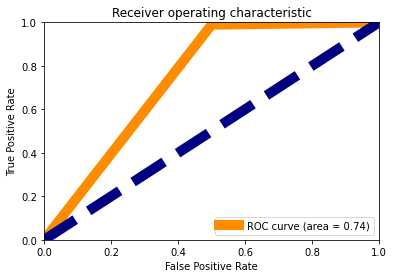

In [66]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(y_test,pred)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color = 'darkorange', lw=10, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1], color='navy', lw=10, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()

# Model Saving

In [67]:
import pickle
filename = 'loan_status.pkl'
pickle.dump(gnb,open(filename,'wb'))

# Conclusion

In [68]:
import numpy as np
a = np.array(y_test)
predicted = np.array(gnb.predict(x_test))
df_comp = pd.DataFrame({'original':a,'predicted':predicted},index=range(len(a)))
df_comp

,original,predicted
0,1,1
1,1,1
2,0,0
3,1,1
4,0,0
...,...,...
111,0,1
112,1,1
113,0,1
114,1,1
